In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
data1=pd.read_csv("data.csv")
data=pd.DataFrame(data1)

In [9]:
data.shape

(20000, 786)

In [13]:
print(data.head(5))

   Unnamed: 0  label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  \
0           0      1       0       0       0       0       0       0       0   
1           1      0       0       0       0       0       0       0       0   
2           2      1       0       0       0       0       0       0       0   
3           3      4       0       0       0       0       0       0       0   
4           4      0       0       0       0       0       0       0       0   

   pixel7  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0     

In [15]:
y=data[['label']]
x=data.drop(["Unnamed: 0","label"],axis=1)
print(x.shape)
print(y.shape)


(20000, 784)
(20000, 1)


# DISPALY A NUMBER

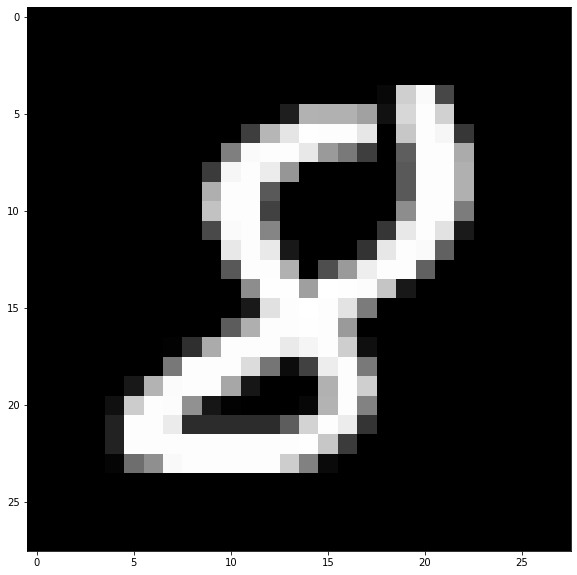

In [16]:
plt.figure(figsize=(10,10))
idx= 220
grid_data=x.iloc[idx].to_numpy().reshape(28,28)
plt.imshow(grid_data,interpolation="none",cmap="gray")
plt.show()



# 2D VISUALISATION USING PCA

# 1. 1ST 15K DATA-POINTS

In [17]:
x1=x.head(15000)
y1=y.head(15000)

print("the shape of sample data =",x1.shape)

the shape of sample data = (15000, 784)


# 2. DATA PREPROCESSING COLUMN STANDARDISATION


In [18]:
from sklearn.preprocessing import StandardScaler
std_data=StandardScaler().fit_transform(x1)
print(std_data.shape)

(15000, 784)


# 3.COVARIANCE MATRIX (A^T * A)

In [19]:

covar_matrix=np.matmul(std_data.T,std_data)
covar_matrix
print("the shape of covariance matrix =",covar_matrix.shape)


the shape of covariance matrix = (784, 784)


# 4.EIGENVALUE AND EIGEN VECTOR

In [20]:
from scipy.linalg import eigh

# the parameter "eigvals" is defined (low value to high value)
# eigh function will return the eigenvalue in ascending order
#this code generates only the top 2(782,783) eigenvalues


values,vectors = eigh(covar_matrix,eigvals=(782,783))


print("shape of eigen vectors =",vectors.shape)

vectors=vectors.T

print(" updated shape of eigen vectors =",vectors.shape)

print("eigenvalues are ::",values)
print(vectors[1],vectors[0])

shape of eigen vectors = (784, 2)
 updated shape of eigen vectors = (2, 784)
eigenvalues are :: [435532.55785282 605719.29173629]
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  1.06511179e-03  1.83893126e-03
  3.62204738e-03  4.16191900e-03  4.75115800e-03  5.00659256e-03
  4.11777308e-03  2.31563673e-03  2.85275312e-03  1.83088217e-03
  6.39244235e-04 -7.39014465e-04 -7.19833759e-04 -2.33835135e-06
 -4.39280928e-05  1.62819365e-03  1.98573389e-03 -5.16987883e-26
  0.00000000e+00 -4.03896

In [21]:
#PROJECTING THE ORIGINAL DATA SAMPLE ON THE PLANE
#FORMED BY TWO PRINCIPAL EIGEN VECTORS BY VECTOR-VECTOR MULTIPICATION


import matplotlib.pyplot as plt
new_coordinates=np.matmul(vectors,std_data.T)

print("resulatnat new data points shape",new_coordinates.shape)

resulatnat new data points shape (2, 15000)


In [22]:
new_coordinates = (np.vstack((new_coordinates,y1.T))).T
print(new_coordinates.shape)

(15000, 3)


In [23]:
dataframe=pd.DataFrame(data=new_coordinates,columns=("1st_principal","2nd_principal","y"))
print(dataframe.head())

   1st_principal  2nd_principal    y
0      -5.558661      -5.043558  1.0
1       6.193635      19.305278  0.0
2      -1.909878      -7.678775  1.0
3       5.525748      -0.464845  4.0
4       6.366527      26.644289  0.0


# PLOTTING IN 2D SPACE

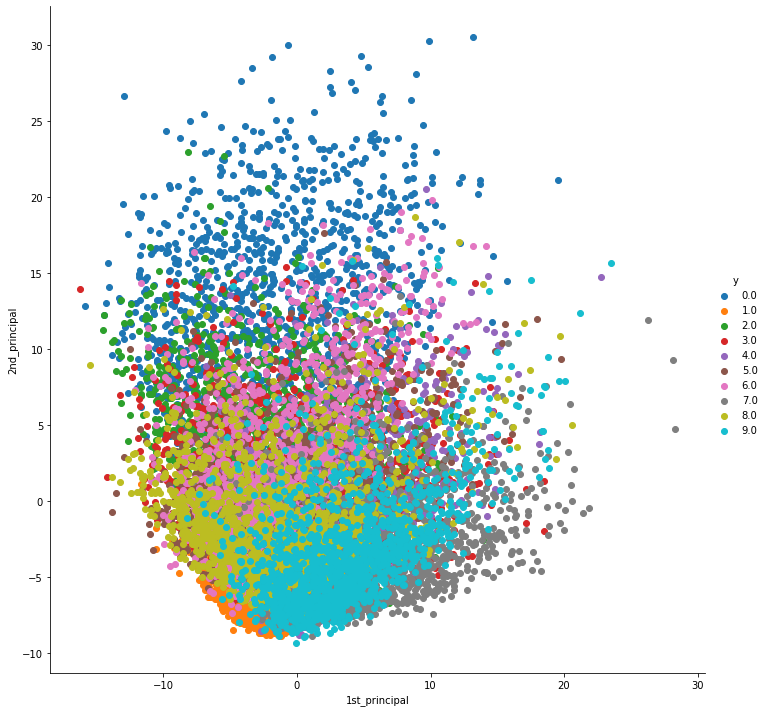

In [24]:
import seaborn as sns
sns.FacetGrid(dataframe,hue="y",height=10).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()

# PCA USING SCIKIT LEARN

In [25]:
from sklearn import decomposition
pca=decomposition.PCA()

In [26]:
pca.n_components=2
pca_data=pca.fit_transform(std_data)
print("shape of pca_reduced data = ",pca_data.shape)

shape of pca_reduced data =  (15000, 2)


In [27]:
print(y1.shape)

(15000, 1)


In [28]:
pca_data=np.vstack((pca_data.T,y1.T))

In [29]:
d=pca_data.T
d.shape

(15000, 3)

In [30]:
dataframe1=pd.DataFrame(data=d,columns=("1st_principal","2nd_principal","y"))
print(dataframe1.head())

   1st_principal  2nd_principal    y
0      -5.043567      -5.558498  1.0
1      19.305299       6.193981  0.0
2      -7.678776      -1.909860  1.0
3      -0.464806       5.525569  4.0
4      26.644297       6.366667  0.0


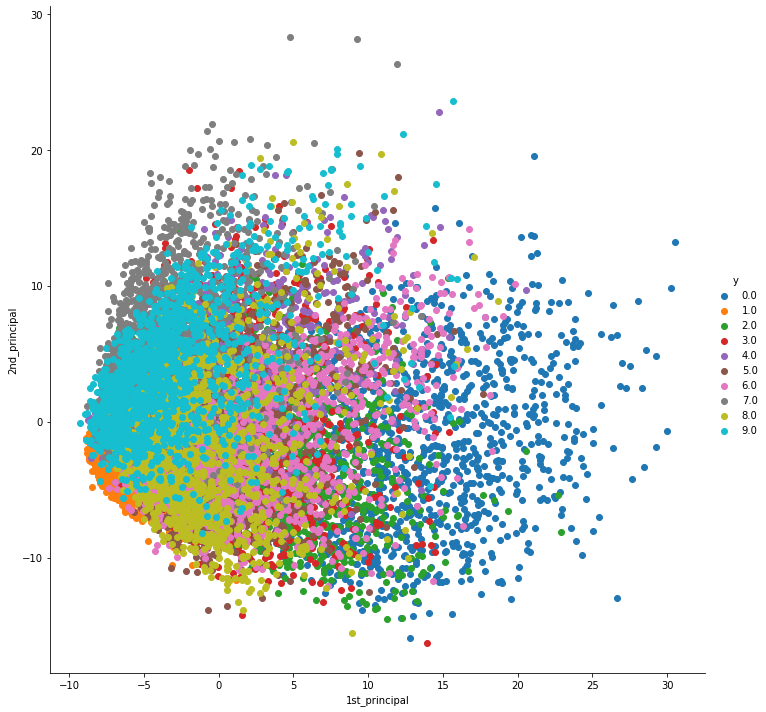

In [31]:
import seaborn as sns
sns.FacetGrid(dataframe1,hue="y",height=10).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()

# PCA FOR DIMENSIONALITY REDUCTION(NOT FOR VISUALISATION BUT FOR ML MODELS)

In [32]:
pca.n_components=784
pca_data=pca.fit_transform(std_data)


percentage_var_explained =pca.explained_variance_ / np.sum(pca.explained_variance_)
cum_var_explained=np.cumsum(percentage_var_explained)



# plotting the pca spectrum

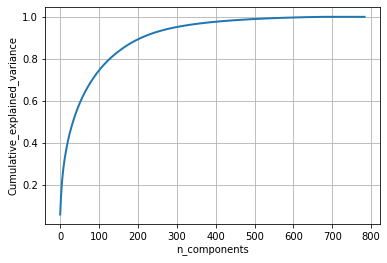

In [33]:
plt.figure(1,figsize=(6,4))
plt.clf()
plt.plot(cum_var_explained,linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel("Cumulative_explained_variance")
plt.show()

# t-SNE USING SCIKIT-LEARN

In [34]:
from sklearn.manifold import TSNE

model=TSNE(n_components=2,random_state=0)#perplexity=30.0  ,n_iter=1000
#configuring the parameters
#the number of components=2
#default preplexity=30
#default learning rate=200
#deault iteration=1000
tsne_data=model.fit_transform(std_data)

c:\users\tapas\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\users\tapas\appdata\local\programs\python\python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [35]:
tsne_data=np.vstack((tsne_data.T,y1.T))

In [36]:
tsne_data=tsne_data.T


In [37]:
dataframe2=pd.DataFrame(data=tsne_data,columns=('v1','v2','y'))
dataframe2.head()


,v1,v2,y
0,-38.541817,33.550289,1.0
1,-64.072922,-31.010363,0.0
2,-12.231525,69.134888,1.0
3,53.961681,-17.717081,4.0
4,-68.347153,-42.397770,0.0


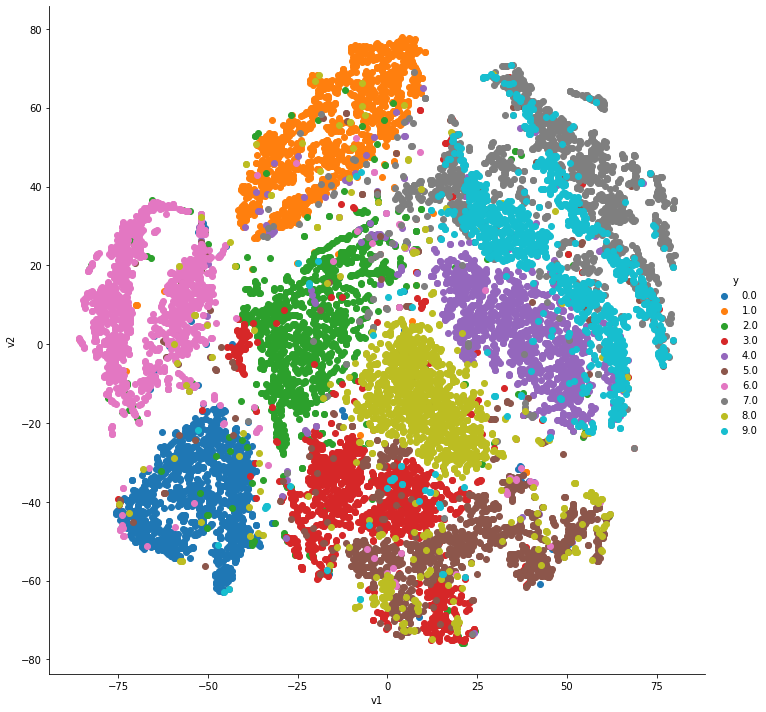

In [38]:
sns.FacetGrid(dataframe2,hue="y",height=10).map(plt.scatter,'v1','v2').add_legend()
plt.show()